<a href="https://colab.research.google.com/github/Chris-masa/Simulate-Asset-Formation-555-plan-/blob/master/%E6%8A%95%E8%B3%87%E8%A8%88%E7%94%BB.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#◎Parameter記述クラス

# Main

######deposit...１月に入金する金額,  
######fee...手数料,  
######expected_gain...予測される年利,  
######|
######UseNISA...NISAを使うかどうか(デフォルト：False),  
######reinvestmentd...再投資をするかどうか(デフォルト：True),  
######year...現在の経過年数(デフォルト：0),  
######month...現在の経過月数(デフォルト：0),  
######tax...税金(デフォルト：8.0),  
######balance_init初期投資額(デフォルト：0),  
######withdrawal...1か月あたりの出金額(デフォルト：0)

In [22]:
import matplotlib
import sys
import copy


#最大継続年数に達するか、目標に達成した時点で、マークが付きます。
#両方の条件を達成するまで、もしくは継続年数が100年になった時点で計算は終了します。
target_amount = 5000  #単位は万
continuation_years = 30  #最大継続年数
deposit = 6.0  #一か月の入金(万円)
fee = 0.1  # 手数料(％)
expected_gain = 7.0 # 予想利益(％)



#各銘柄の初期値を設定
#パラメータをリストに入れてリテラブルにすれば、複数銘柄でもスムーズに記述できる？
i_para = Ipara(6.0, 0.1, 7.0, use_NISA=True)

calculater = CalcAsset()
balance_transition = []
balance_transition = calculater.calculate(i_para, target_amount, continuation_years)

print(balance_transition)

#    for amount in self.balance_transition:
#      print(amount)
    


class CalcAsset():
  def calculate(self, i_para, target, max_year):
    print("calc start!")
    balance_transition = []
    debag_month=0
    balance = i_para.balance_init
    balance_transition.append(balance)
    for year in range(0, continuation_years):
      preview_balance = balance
      for month in range(1, 13):
        debag_month+=1
        balance += i_para.deposit
        balance += balance * (i_para.expected_gain/100)/12  #純利益 
        if(balance <= 0):
          return balance_transition
      
#      print("year:",end=" ")
#      print(year+1,end=" balance: ")
#      print(balance)
      
      balance -= balance * (i_para.fee/100) #手数料をマイナス
      income = balance - preview_balance
      if(income < 0):
        continue

      if i_para.use_NISA==False or year>5:   # NISA適応範囲外なら
        balance -= income * (i_para.tax/100)
      
      balance_transition.append(balance)

      if year == max_year:
        pass
        ##処理追加予定
      if  balance >= target:
        pass
        ##処理追加予定２
      if year >= max_year and balance >= target:
        pass
        ##終了処理

    return balance_transition
      


class Ipara():
  def __init__(self, deposit, fee, expected_gain, use_NISA=True, reinvestmented=True, year=0, month=0, tax=20.3, balance_init=0, withdrawal=0):
    self.deposit = deposit
    self.fee = fee
    self.expected_gain = expected_gain

    self.use_NISA = use_NISA
    self.reinvestmented = reinvestmented
    self.year = year
    self.month = month
    self.tax = tax
    self.balance_init = balance_init
    self.withdrawal = withdrawal


calc start!
[0, 74.71446297075684, 154.74992493325988, 240.48533568041927, 332.3266329722111, 430.7086645590691, 536.0972470875369, 626.0738643531648, 721.1576065335632, 821.6383569971864, 927.8224530603964, 1040.0336199230771, 1158.6139576149747, 1283.9249839616853, 1416.3487367499938, 1556.288938452758, 1704.1722270642495, 1860.4494567984252, 2025.597072615582, 2200.1185627679433, 2384.545993792573, 2579.4416326313767, 2785.3996608235757, 3003.0479859967354, 3233.050156179076, 3476.107382769257, 3732.960678331104, 4004.3931157307934, 4291.232215503979, 4594.352468731261, 4914.678003113517]


[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]
[0, 74.71446297075684, 154.74992493325988, 240.48533568041927, 332.3266329722111, 430.7086645590691, 536.0972470875369, 626.0738643531648, 721.1576065335632, 821.6383569971864, 927.8224530603964, 1040.0336199230771, 1158.6139576149747, 1283.9249839616853, 1416.3487367499938, 1556.288938452758, 1704.1722270642495, 1860.4494567984252, 2025.597072615582, 2200.1185627679433, 2384.545993792573, 2579.4416326313767, 2785.3996608235757, 3003.0479859967354, 3233.050156179076, 3476.107382769257, 3732.960678331104, 4004.3931157307934, 4291.232215503979, 4594.352468731261, 4914.678003113517]


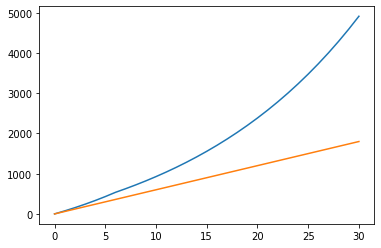

In [30]:
import matplotlib.pyplot as plt
import copy
x = list(range(continuation_years+1))
y = balance_transition
z = [n*6*10 for n in x]

print(x)
print(y)
plt.plot(x,y)
plt.plot(x,z)
plt.show()

# 新しいセクション